## CDS4004 Tutorial 9
### Network Centrality

<div class="alert alert-info">
    
Your name: Ng Ngai Fung

Your student ID: 4112150
    
</div>

Before we start, we can execute the cell below to load the libraries/modules that we need to use in this tutorial.

In [23]:
import networkx as nx
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')

### Part 1 - Toy Example

In [24]:
G = nx.path_graph(10)
pos = nx.spring_layout(G, seed=3)

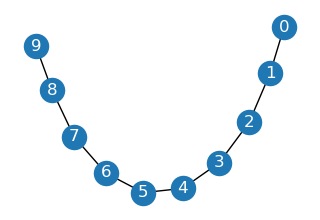

In [25]:
plt.figure(figsize=(3,2))
nx.draw(G, pos=pos, with_labels=True, font_color="white")

#### Execute the cell below to compute the closeness_centrality by networkx

In [26]:
cc = nx.closeness_centrality(G)
cc.values()

dict_values([0.2, 0.24324324324324326, 0.2903225806451613, 0.3333333333333333, 0.36, 0.36, 0.3333333333333333, 0.2903225806451613, 0.24324324324324326, 0.2])

#### Task 1.1: Write a function to compute the closeness centrality of each node and compare your results with the cell above. 

In [44]:
def closeness_centrality(G):
    shortest_paths = dict(nx.all_pairs_shortest_path(G))
    closeness_centrality = {}
    total_nodes = len(G.nodes)
    for node in G.nodes:
        sum_shortest_paths = 0
        # print(shortest_paths[node])
        for v in shortest_paths[node]:
            # print(shortest_paths[node][v])
            # print(len(shortest_paths[node][v]))
            sum_shortest_paths = sum_shortest_paths + len(shortest_paths[node][v]) - 1
        # print(sum_shortest_paths)
        closeness_centrality[node] = (total_nodes - 1) / sum_shortest_paths
    return closeness_centrality

closeness_centrality(G)

{0: 0.2,
 1: 0.24324324324324326,
 2: 0.2903225806451613,
 3: 0.3333333333333333,
 4: 0.36,
 5: 0.36,
 6: 0.3333333333333333,
 7: 0.2903225806451613,
 8: 0.24324324324324326,
 9: 0.2}

#### Execute the cell below to compute the harmonic centrality by networkx

In [28]:
hc = nx.harmonic_centrality(G)
hc

{0: 2.8289682539682537,
 1: 3.717857142857143,
 2: 4.092857142857143,
 3: 4.283333333333333,
 4: 4.366666666666666,
 5: 4.366666666666666,
 6: 4.283333333333333,
 7: 4.0928571428571425,
 8: 3.7178571428571425,
 9: 2.828968253968254}

#### Task 1.2: Write a function to compute the harmonic_centrality of each node and compare your results with the cell above. 

In [48]:
def harmonic_centrality(G):
    shortest_paths = dict(nx.all_pairs_shortest_path(G))
    harmonic_centrality = {}
    for node in G.nodes:
        temp_index = 0
        for v in shortest_paths[node]:
            if len(shortest_paths[node][v]) == 1:
                continue
            # print(1/(len(shortest_paths[node][v])-1))
            temp_index = temp_index + 1/(len(shortest_paths[node][v])-1)
        harmonic_centrality[node] = temp_index
    return harmonic_centrality

harmonic_centrality(G)

{0: 2.8289682539682537,
 1: 3.717857142857143,
 2: 4.092857142857143,
 3: 4.283333333333334,
 4: 4.366666666666667,
 5: 4.366666666666667,
 6: 4.283333333333334,
 7: 4.092857142857143,
 8: 3.717857142857143,
 9: 2.8289682539682537}

#### Execute the cell below to adjust the closeness centrality values

In [30]:
adapted_cc_values = [v **2 * 10000 for v in cc.values()]
adapted_cc_values

[400.00000000000006,
 591.6727538349161,
 842.8720083246618,
 1111.111111111111,
 1296.0,
 1296.0,
 1111.111111111111,
 842.8720083246618,
 591.6727538349161,
 400.00000000000006]

#### Based on the adjusted values to plot the graph

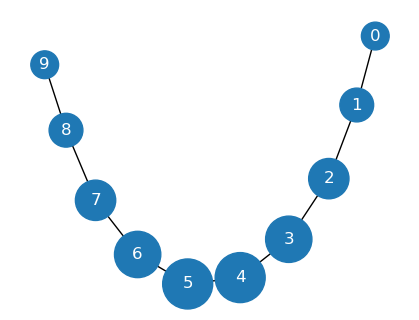

In [31]:
plt.figure(figsize=(4,3))
nx.draw(G, nodelist=cc.keys(), node_size=adapted_cc_values, pos=pos, with_labels=True, font_color="white")

#### Task 1.3: define a function draw_network(G, dict_centrality) to draw a network and the node size is based on the following specified centralities:

    nx.degree_centrality() 
    nx.betweenness_centrality() 
    nx.eigenvector_centrality() 
    nx.harmonic_centrality()

Invalid centrality measure


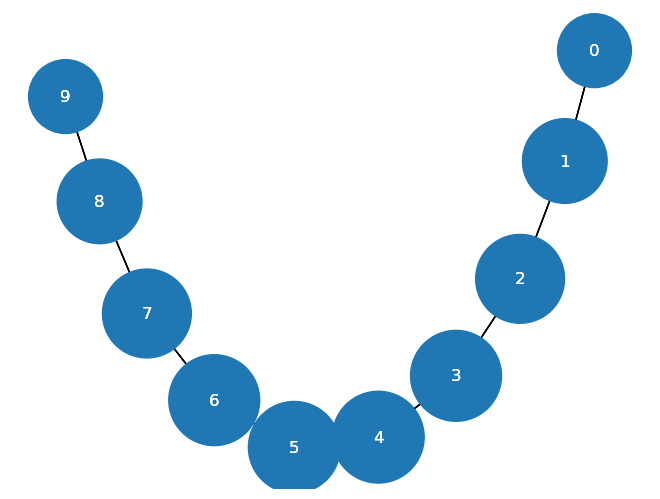

In [53]:
def draw_network(G, dict_centrality, pos):
    if dict_centrality == "degree":
        node_size = [v * 1000 for v in dict(nx.degree(G)).values()]
        nx.draw(G, nodelist = G, node_size=node_size, pos=pos, with_labels=True, font_color="white")
    elif dict_centrality == "closeness":
        node_size = [v **2 * 10000 for v in nx.closeness_centrality(G).values()]
        nx.draw(G, nodelist = G, node_size=node_size, pos=pos, with_labels=True, font_color="white")
    elif dict_centrality == "harmonic":
        node_size = [v * 1000 for v in nx.harmonic_centrality(G).values()]
        nx.draw(G, nodelist = G, node_size=node_size, pos=pos, with_labels=True, font_color="white")
    else:
        print("Invalid centrality measure")
        return

draw_network(G, "degree", pos)
draw_network(G, "closeness", pos)
draw_network(G, "harmonic", pos)
draw_network(G, "???", pos)

### Part 2 - A Real Network

More information could be found:

    https://en.wikipedia.org/wiki/Zachary%27s_karate_club
    https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html

#### Execute the cell below to load and plot the kcg network.

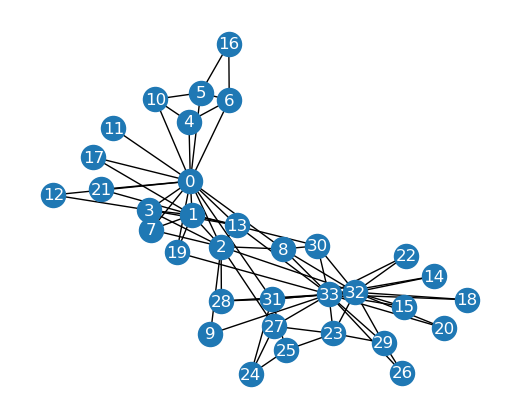

In [54]:
kcg = nx.karate_club_graph()
pos_kcg = nx.spring_layout(kcg,seed = 1)
plt.figure(figsize=(5,4))
nx.draw(kcg, pos=pos_kcg, with_labels=True, font_color="white")

#### Task 2.1 Apply the draw_network() to kcg with the most suitable centrality and draw the graph. Pay attention to the side of the nodes to ensure most of them are neither too large nor too small.

    nx.closeness_centrality()
    nx.degree_centrality()
    nx.betweenness_centrality()
    nx.eigenvector_centrality()
    nx.harmonic_centrality()

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}
{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.0606060606060606

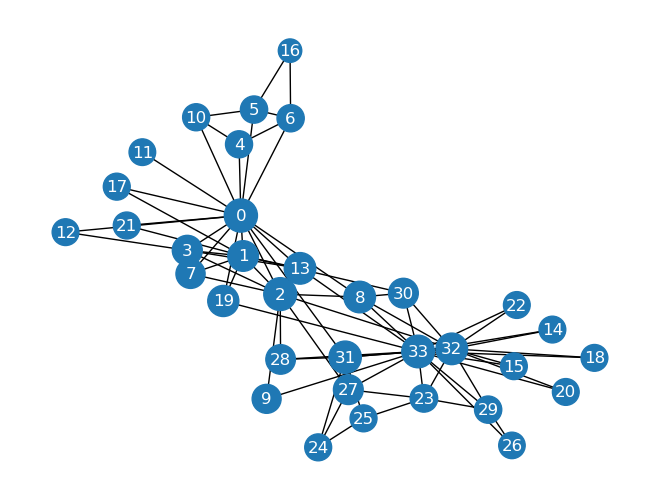

In [74]:
#write your code here
print(nx.closeness_centrality(kcg))
print(nx.degree_centrality(kcg))
print(nx.betweenness_centrality(kcg))
print(nx.eigenvector_centrality(kcg))
print(nx.harmonic_centrality(kcg))

nx.draw(kcg, nodelist = kcg, node_size=[v*1000 for v in nx.closeness_centrality(kcg).values()], pos=pos_kcg, with_labels=True, font_color="white")

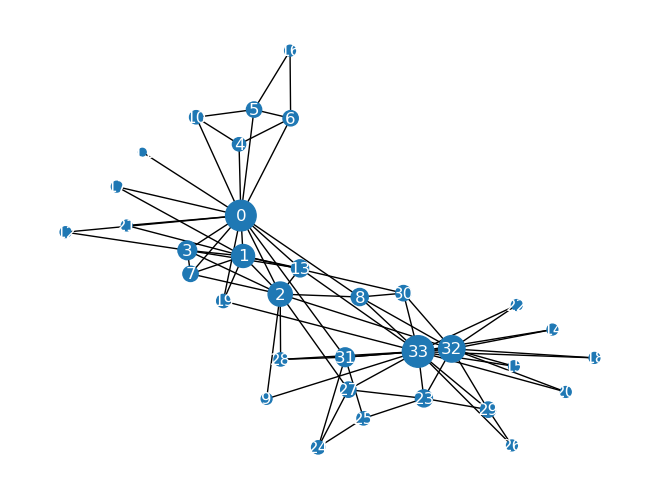

In [66]:
nx.draw(kcg, nodelist = kcg, node_size=[v*1000  for v in nx.degree_centrality(kcg).values()], pos=pos_kcg, with_labels=True, font_color="white")

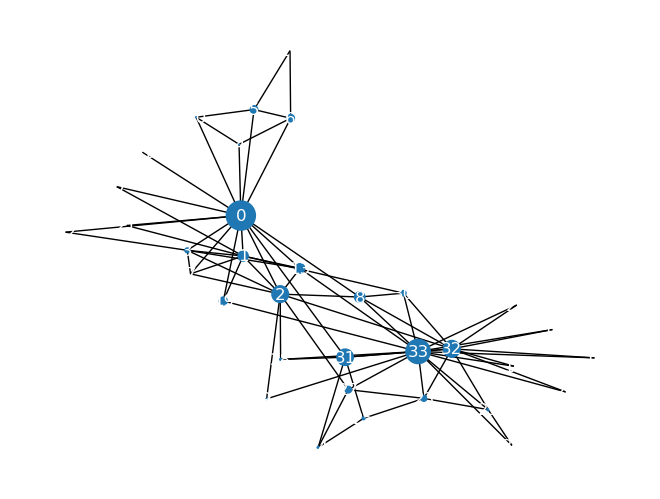

In [67]:
nx.draw(kcg, nodelist = kcg, node_size=[v*1000 for v in nx.betweenness_centrality(kcg).values()], pos=pos_kcg, with_labels=True, font_color="white")

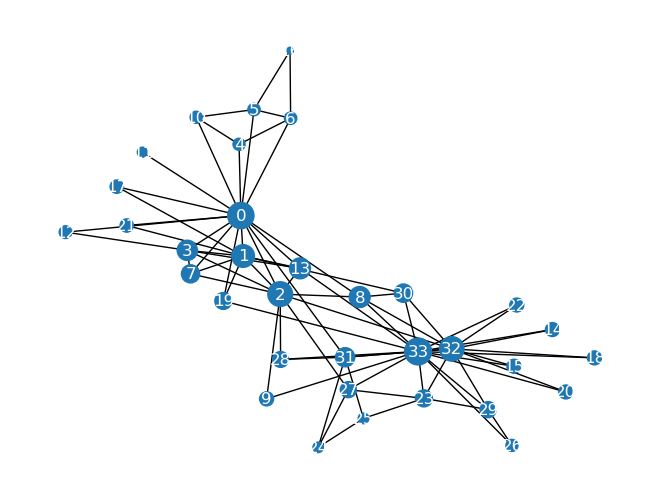

In [68]:
nx.draw(kcg, nodelist = kcg, node_size=[v*1000 for v in nx.eigenvector_centrality(kcg).values()], pos=pos_kcg, with_labels=True, font_color="white")

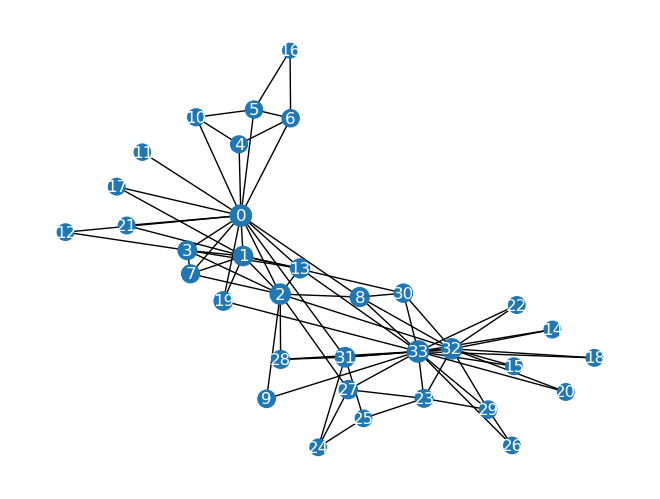

In [72]:
nx.draw(kcg, nodelist = kcg, node_size=[v*10  for v in nx.harmonic_centrality(kcg).values()], pos=pos_kcg, with_labels=True, font_color="white")

#### Task 2.2 In this question, we are going to investigate whether different centralities are related? 
Hints: Construct the dataframe with centralities values and make use of `Pandas dataframe.corr()` to find the pairwise correlation.

#### Task 2.2.1 construct the dataframe with centralities

In [82]:
import pandas as pd
df_ = pd.DataFrame([nx.closeness_centrality(kcg), nx.degree_centrality(kcg), nx.betweenness_centrality(kcg), nx.eigenvector_centrality(kcg), nx.harmonic_centrality(kcg)])
df_

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.568966,0.485294,0.559322,0.464789,0.379310,0.383721,0.383721,0.440000,0.515625,0.434211,...,0.375000,0.375000,0.362637,0.458333,0.452055,0.383721,0.458333,0.540984,0.515625,0.550000
1,0.484848,0.272727,0.303030,0.181818,0.090909,0.121212,0.121212,0.121212,0.151515,0.060606,...,0.090909,0.090909,0.060606,0.121212,0.090909,0.121212,0.121212,0.181818,0.363636,0.515152
2,0.437635,0.053937,0.143657,0.011909,0.000631,0.029987,0.029987,0.000000,0.055927,0.000848,...,0.002210,0.003840,0.000000,0.022333,0.001795,0.002922,0.014412,0.138276,0.145247,0.304075
3,0.355483,0.265954,0.317189,0.211174,0.075966,0.079481,0.079481,0.170955,0.227405,0.102675,...,0.057054,0.059208,0.075582,0.133479,0.131079,0.134965,0.174760,0.191036,0.308651,0.373371
4,23.166667,19.166667,21.000000,17.666667,14.666667,15.166667,15.166667,16.416667,18.500000,15.583333,...,13.916667,13.916667,13.950000,16.916667,16.416667,15.366667,16.916667,19.333333,20.916667,23.250000


#### Task 2.2.2 Find the pairwise correlation

In [81]:
#write your code here
df_.T.corr()

,0,1,2,3,4
0,1.000000,0.771591,0.717945,0.904615,0.958719
1,0.771591,1.000000,0.914643,0.917255,0.911845
2,0.717945,0.914643,1.000000,0.803213,0.832058
3,0.904615,0.917255,0.803213,1.000000,0.969223
4,0.958719,0.911845,0.832058,0.969223,1.000000


#### Task 2.2.3 Use seaborn module to generate the heatmap of the correlation dataframe created in Task 2.2.2

<Axes: >

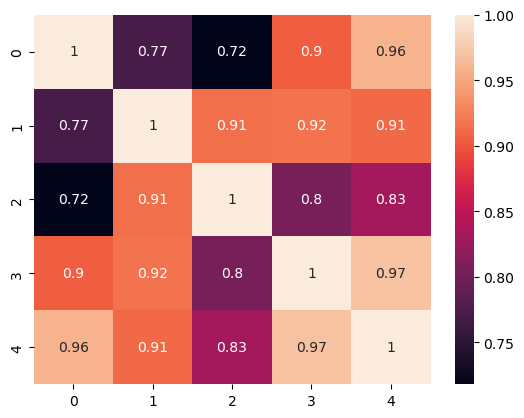

In [83]:
#write your code here
sns.heatmap(df_.T.corr(), annot=True)

#### Task 2.2.4 Please give your conclusion.


0: nx.closeness_centrality(kcg)<br>
1: nx.degree_centrality(kcg)<br>
2: nx.betweenness_centrality(kcg)<br>
3: nx.eigenvector_centrality(kcg)<br>
4: nx.harmonic_centrality(kcg)

<br>

<br>

1 and 3 have the highest correlation between each others <br>
0 and 2 have the lowest correlation between each others
